<div align="center">
    <img src="https://logoyab.com/wp-content/uploads/2024/08/IUST-University-Logo-1030x1030.png" alt="Logo" width="200">
    <p><b>Project2 @ AI Course, Dr. Abdi</b></p>
    <p><b>ŸêDesinged by kasra shariati & Amirhossein Hosseini</b></p>
</div>

--------


*Full Name:* Parham Soltani

*Student Number:* 99412123

------

**Welcome to the Second AI assignment (:**

In [74]:
#DO NOT IMPORT ANY OTHER LIBRARY
#Run these cells as it is
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import math
from tqdm import tqdm
from copy import deepcopy
import seaborn as sns
try:
    import plotly.graph_objects as go
except:
    !pip install plotly # Or install the plotly library manually
    import plotly.graph_objects as go

# required only for jupyter notebooks / while running on colab
%matplotlib inline

# set seed
seed = 1
np.random.seed(seed)

# Part I - Data pre-processing + linear regression

## Standardization

Standardizing the data is a good practice. Standardization is a scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation. Standardizing features helps us in training the model faster.

The formula for standardizing the data is given below:

# $X‚Ä≤= \frac{X‚àíŒº}{œÉ}\hspace{4cm}-(a)$

where

Œº : mean of the attribute

œÉ : standard deviation of the attribute

Numpy provides functions to implement the above

For additional information refer [this](https://towardsai.net/p/data-science/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff).

Note: You do not need to standardize Y

In [75]:
def standardize(X):
    """
    Args:
        'X': numpy ndarray
    Returns:
        'X_norm': normalized X also in numpy ndarray format
    """
    # START TODO ################
    mean = np.mean(X)
    std = np.std(X)
    X_norm = (X - mean) / std
    return X_norm    
    # END TODO ###################

    raise NotImplementedError()


In [76]:
# Sample test cases
np.random.seed(seed)
x = np.random.randint(0, 100, size = 10)
x = standardize(x)
assert np.allclose(x[1], -0.8183755)
print('Sample Test passed', '\U0001F44D')

Sample Test passed üëç


In [77]:
# hidden test cases. Do not modify

## Initialize parameters

As uncomplicated it may seem, initializing your weights play an important role in overall performance of your model. If initial wts. are too small/large then it may lead to problem of vanishing/emploding gradients respectively.

For introductory purpose, we will be taking weights from Gaussian Distribution. But there are has been tremendous research in this area, and Xavier Initialization has proved to be very effective for multiple tasks. There are in-built methods for Xavier initialization in frameworks like tensorflow, pytorch, caffe. To understand the maths behind Xavier Initialization, refer to the article attached below!

Refer to this article to understand the importance of effective initialization. [deeplearning.ai/notes](https://www.deeplearning.ai/ai-notes/initialization/#IV)

For our model we will be initialising Weights as an array or random integers and bias as array of zeroes. You can take help of formula $(i)$ from the next section's theory i.e. forward to know the relation between the dimensions of W and b with respect to X and Y.

###
Initialise weights with the shape given in function below having values **between 0 and 1** using numpy.random.rand function.

(NOTE : USE **numpy.random.rand** function for this. Different functions can create different random values and this might result in your code not passing the test cases)

> Initialise bias with the shape given below as a numpy array having all zeros.

In [78]:
def initialize_parameters(X, Y):
    """
    Args:
    'Y': ndarray of shape (m,output_size)
    'X': ndarray of shape (m, no. of features)
    Returns:
    'W', 'b': Wts. and biases
    'W' : ndarray of shape(no. of features, output_size)
    'b' : ndarray of shape(1, output_size)

    USE output_size = 1 since we are only predicting median_house_value.
    IF we predicting say house price and no of people that can stay in it, then we would require output_size = 2 and so on.
    """
    # START TODO ################
    n_features = X.shape[1]
    output_size = 1  # Since we're only predicting median_house_value
    
    # Initialize weights with random values between 0 and 1
    W = np.random.rand(n_features, output_size)
    
    # Initialize bias with zeros
    b = np.zeros((1, output_size))
    
    return W, b
    # END TODO ###################

    raise NotImplementedError()

In [79]:
# sample test case
W_check, b_check = initialize_parameters(np.array([[1, 2], [3, 4]]), np.array([[0], [1]]))
np.random.seed(seed)
W_check, b_check = initialize_parameters(np.array([[1, 2], [3, 4]]), np.array([[0], [1]]))
assert W_check.shape == (2,1)
assert b_check.shape == (1,1)
assert np.allclose(W_check[0],[0.417022004702574])
print('Sample Test passed', '\U0001F44D')

Sample Test passed üëç


In [80]:
# hidden test cases. Do not modify

## Forward

This is the function where actual calculation of the prediction values happen with the help of weights and bias.

For two varaibles it is a straight line of form $y = mx + c$ there m and c are slope and intercepts of line respectively but for more than one variables since each variable contributes to the output value the equation becomes a dot product of weights with the variables. Where each weight ($w_i$) represent the propotionality factor of prediction values with respect to the corresponding variable ($x_i$). $b$ is refered as bias which is analogus to the intercept value in case of two variables.

# $ \boxed{Y_{pred} = w_1 x_1 + w_2 x_2 + .... + w_i x_i + b}\hspace{4cm} -(i)$

or

# $ Y_{pred} = X \cdot W + b$

In [81]:
def forward(X, W, b):
    """
    Args:
    'X': ndarray of shape (m,no.of features)
    'W': ndarray of shape (no. of features, output_size)
    'b': ndarray of shape (1, output_size)
    Returns:
    calculated Y_pred value using X,W and b
    """
    # START TODO ################
    Y_pred = np.dot(X, W) + b
    return Y_pred
    # END TODO ###################
    raise NotImplementedError()

In [82]:
#sample test case
#DO NOT CHANGE THIS CODE
np.random.seed(seed)
X_test = np.random.randn(2,1)
np.random.seed(seed+1)
W_test = np.random.randn(1,2)
np.random.seed(seed+2)
b_test = np.random.randn(1,2)
forward_test = forward(X_test, W_test, b_test)
assert np.allclose(forward_test, [[1.1116698 , 0.34511309],[2.04358276, 0.47093144]])
print('Sample Test passed', '\U0001F44D')


Sample Test passed üëç


In [83]:
# hidden test cases. Do not modify

## Loss

A loss function is a measure of how good a prediction model does in terms of being able to predict the expected outcome. There is not a single loss function that works for all kind of data. It depends on a number of factors including the presence of outliers, choice of machine learning algorithm, time efficiency of gradient descent, ease of finding the derivatives and confidence of predictions.

For our dataset, we have chosen Mean Square Error because of its ease of implementation and competitive performance with other loss functions.

# $ MSE = \frac{\sum_{i = 1}^{m} ({Y^{pred}_i - Y^{true}_i})^2}{2m}$

here $Y^{pred}_i$ is the $i^{th}$ prediction value corresponding to $i^{th}$  $Y^{true}_i$ (actual)value.
$m$ is the number of actual values

In [84]:
def loss(y_pred, y_true):
    """
    Args:
    'y_pred': ndarray of shape (m,1) storing output predictions
    'y_true': ndarray of shape (m,1) storing true house prices
    Returns:
    'mse': mean square error
    """

    # START TODO ################
    m = y_true.shape[0]
    mse = np.sum((y_pred - y_true) ** 2) / (2 * m)
    return mse
    # END TODO###################
    raise NotImplementedError()

In [85]:
#sample test case
np.random.seed(seed)
y1 = np.random.randn(10,1)
np.random.seed(seed+1)
y2 = np.random.randn(10,1)
mse_sample = loss(y1, y2)
assert np.allclose(mse_sample, 1.38652357)
print('Sample Test passed', '\U0001F44D')

Sample Test passed üëç


In [86]:
# hidden test cases. Do not modify

## Gradients

In order to optimise our model and increase it's accuracy we will use a technique called **Stochastic Gradient Decent**(SGD). As per wikipedia Stochastic gradient descent is an iterative method for optimizing an objective function with suitable smoothness properties. From this we understand that we would be minimising the error between our prediction values and actual values.
But before that we need to calculate our prediction values using the same formula as in the forward function.

Now after getting certain value of loss in our first prediction we would change our weights and bias in a manner that our loss reduces.

# $W_j = W_{j-1} - \frac{\partial L(Y_p)}{\partial W}$

where $W_j$ stands for weight at $j^{th}$ iteration and $\frac{\partial L(Y_p)}{\partial W}$ stands for partial derivative of Loss function with respect to weights. Above formula upon partial differentiation simplifies to

# $\boxed{W_j = W_{j-1} - \alpha * dW }     \hspace{3cm}    -(ii)$

where $\alpha$ is a constant called **learning rate** and dW is the partial derivative part given by the following formula

# $ dW = \frac{\partial L(Y_p)}{\partial Y}\frac{\partial Y}{\partial W} = \frac{2((WX + b) - Y_t)}{2m}* (X)  $

or:

# $ dW = \frac{\partial L(Y_p)}{\partial W} =  \frac{X^T*(Y_p - Y_t)}{m}  $

The $ {X^T} $ implies Transpose of  $ X $ (Just try to matrix multiply $ X $ directly with  $ (Y_p - Y_t) $ and you'll understand why we need to use transpose of X in multiplication)

<br/>
Similar analysis can be done for bias(b)

# $b_j = b_{j-1} - \frac{\partial L(Y_p)}{\partial b}$

which can also be written as

# $\boxed{b_j = b_{j-1} - \alpha * db }      \hspace{3cm}    -(iii)$

# $ db = \frac{\partial L(Y_p)}{\partial b} =  \sum\frac{(Y_p - Y_t)}{m}  $

$dW$ and $db$ are together refered as gradients

In [87]:
def grads(X, y_pred, y_true):
    """
    Args:
    'X': The input matrix
    'y_pred': ndarray of shape (m,1) storing output predictions
    'y_true': ndarray of shape (m,1) storing true house prices
    Returns:
    'dW': gradients of weights
    'db': gradient of biases
    """

    # START TODO ################
    m = X.shape[0]
    
    # Calculate difference between predictions and true values
    difference = y_pred - y_true
    
    # Calculate gradients
    dW = np.dot(X.T, difference) / m
    db = np.sum(difference) / m
    
    return dW, db
    # END TODO###################
    raise NotImplementedError()

In [88]:
#sample Test Case for function grads
np.random.seed(seed)
X_test = np.random.randn(6,3)
np.random.seed(seed+1)
y_pred_test = np.random.randn(6,1)
np.random.seed(seed+2)
y_true_test = np.random.randn(6,1)
gradsop = grads(X_test,y_pred_test,y_true_test)
assert np.allclose(gradsop[0],[[-1.13308432],[ 1.40189064],[-1.15382273]])
assert np.allclose(gradsop[1],-0.5716881366021288)
print('Hidden Test passed', '\U0001F44D')

Hidden Test passed üëç


In [89]:
# hidden test cases. Do not modify

## Stochastic Gradient Decent

After calculating gradients of weights and bias, we will now do the changes in their respective values with the help of expressions $(ii)$ and $(iii)$ discussed above.
Learning Rate ($\alpha$) gives the measure of The amount that the weights are updated during training. Its value lies between 0.0 and 1.0.

The weights are now updated via the learning rules:

$$ W = W - \alpha \text{ } dW $$
$$ b = b - \alpha \text{ } db $$

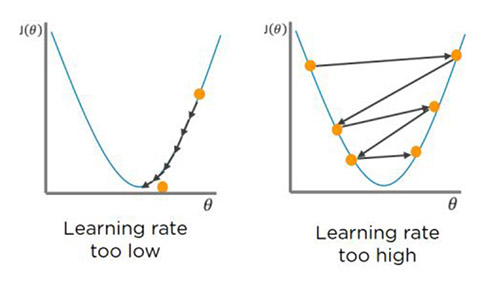

In the above two graphs we see the effect of high learning rates and effect of low learning rates. Each arrow depicts the change in the value at each subsequent step. A higher learning rate might saturate fast towards the local minimum where as the low learning rate takes much more iterations. But high learning rate might also start moving away from the local minimum hence increasing the loss.


In [90]:
def sgd(W, b, grads, alpha):
    """
    Args:
    'W' : (n, output_size) array
    'b' : (1,output_size)
    'grads': list of dW, db
    'alpha': learning rate
    Return:
    Updated parameters
    updated_w : updated value of 'W' using the formula given above
    updated_b : updated value of 'b' using the formula given above
    """

    # START TODO ################
    dW, db = grads
    
    # Update weights and bias
    updated_w = W - alpha * dW
    updated_b = b - alpha * db
    
    return updated_w, updated_b
    # END TODO ###################
    raise NotImplementedError()

In [91]:
#Sample test case for function sgd
#DO NOT CHANGE THIS CODE
np.random.seed(seed)
w_test = np.random.randn(2,1)
np.random.seed(seed+1)
b_test = np.random.randn(1,1)
sgdop = sgd(w_test,b_test,[w_test,b_test],0.01)
assert np.allclose(sgdop[0],[[ 1.60810191],[-0.60563885]])
assert np.allclose(sgdop[1],[[-0.41259027]])
print('Sample Test passed', '\U0001F44D')

Sample Test passed üëç


In [92]:
# hidden test cases. Do not modify

## Build Model

Congratulations! Now we have all the helper functions required to build our model. In this final function, we will call above functions in a systematic way and let our model train on given dataset. Follow the instructions carefully.

### Steps to follow for building the model
The following operations need to be performed in the function "model" below:
<br/>
<br/>
1) Standardize X and Y which are input to the model (Note that X and Y are currently NOT standardized)

2) Ensure shape of X is (m,no.of features) where m is the number of data points and no. of features is 8

3) Initialise the parameters W and b using the STANDARDIZED X and Y with the help of the function *initialize_parameters*

4) For N number of iterations :

    - Calculate y_predicted by performing a forward pass(No need to standardize this y_predicted)
    
    - Find out the loss using y_predicted and y_true
    
    - Append the current loss to a list of all losses so that we can return it and plot it
    
    - Calculate the Gradients
    
    - Update W and b using SGD
    
    - Now use these updated W and b to perform a forward pass in the next iteration and again compute loss, gradients,sgd and so on
    
NOTE : Use all the functions you have declared uptill now in the model function

In [93]:
def model(X , Y, iterations=1500, learning_rate=0.009):
    """
    Args:
    'X': ndarray of shape (m,no. of features) which is NOT Standardized
    'Y': ndarray of shape (m,1) which is NOT Standardized
    'iterations': iterations for training our data
    Returns:
    y_pred: predicted value of output
    y_true: true value of output (The 'Y' argument after standardization gives y_true)
    losses: for grading purpose
    W , b : The final TRAINED weights and biases of the model
    Return in the following order : [y_pred , y_true, losses , W , b]
    """

    # START TODO ################

    # Standardize X and Y
    X_std = standardize(X)
    y_true = standardize(Y)
    
    # Ensure X has the shape (m, no. of features)
    if len(X_std.shape) == 1:
        X_std = X_std.reshape(-1, 1)
    
    # Initialize parameters
    W, b = initialize_parameters(X_std, y_true)
    
    # Initialize list to store losses
    losses = []
    
    # Training loop
    for i in range(iterations):
        # Forward pass
        y_pred = forward(X_std, W, b)
        
        # Calculate loss
        current_loss = loss(y_pred, y_true)
        losses.append(current_loss)
        
        # Calculate gradients
        grads_values = grads(X_std, y_pred, y_true)
        
        # Update parameters using SGD
        W, b = sgd(W, b, grads_values, learning_rate)
    
    # Final prediction
    y_pred = forward(X_std, W, b)
    
    # Plot loss curve
    plt.plot(losses)
    
    return [y_pred, y_true, losses, W, b]
    # END TODO ###################

    raise NotImplementedError()

In [94]:
df =  pd.read_csv('housing_data.csv')
df.dropna(axis=1,inplace=True)
X = df.iloc[:,:8]
Y = np.array(df['median_house_value'])
Y = Y.reshape(Y.shape[0],1)
X.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  
0      1015.0       472.0         1.4936  
1      1129.0       463.0         1.8200  
2       333.0       117.0         1.6509  
3       515.0       226.0         3.1917  
4       624.0       262.0         1.9250

C:\Users\Asus\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


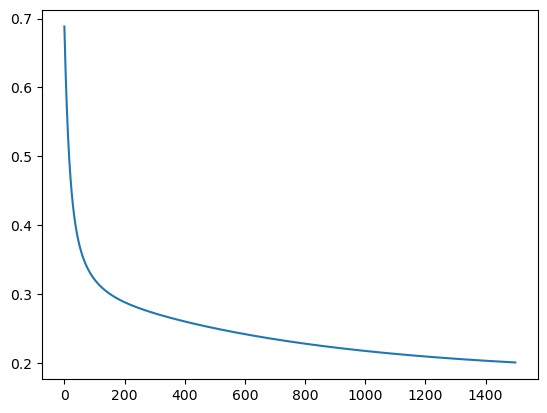

In [95]:
#RUN THIS CELL AS IT IS
np.random.seed(1)
y_pred , y_true, losses , trained_w , trained_b = model(X, Y)

C:\Users\Asus\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Sample Test passed üëç


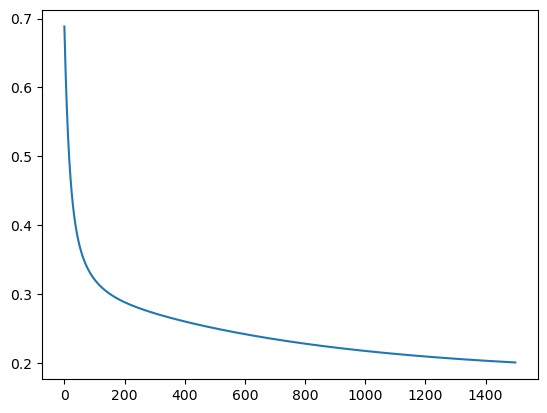

In [96]:
#Sample test case
np.random.seed(1)
y_pred , y_true, losses , trained_w , trained_b = model(X, Y)
assert np.allclose(losses[100], 0.3212234664254295)
print('Sample Test passed', '\U0001F44D')

In [97]:
# hidden test cases. Do not modify

In [98]:
mean_squared_error(y_pred,y_true)

0.40109582241881786

The MSE of linear model is around 0.38 - 0.42 on a scale of 0 - 1.   
In the next section we will compare this score with the MSE obtained by using a Neural Network for the same task.

In [99]:
#Use this to check the accuracy of our model on Test set
df_test  = pd.read_csv('california_housing_test.csv')
scaler = MinMaxScaler()
scaler.fit(df)
test_scaled_data = scaler.transform(df_test)
test_scaled_df = pd.DataFrame(test_scaled_data,columns=df_test.columns) #make sure column names are retained

xtest = test_scaled_df.iloc[:,0:8]
ytest = test_scaled_df.iloc[:,8:9]
xtest  = xtest.values
ytest = ytest.values.reshape(-1,1)

ytest_pred = forward(xtest,trained_w,trained_b)
print(mean_squared_error(ytest,ytest_pred))

0.10642713642263463


## Visualization of work done so far [ungraded]

Visualisation of data is an important technique which can be used to see the results discretly and at the same time make suitable comparisions with the test cases to check how the model is working. Here we try to plot predicted values and actual values together in one graph with median_income as the independent variable. We also plot a correlation heat map to find out that our dependent variable depends on which factors majorly.



In [100]:
#making copies of data
x_new = X
y_pred_short = y_pred
y_true_short = y_true

#converting numpy arrays to pandas dataframe
df_new = pd.DataFrame(x_new)
df1 = pd.DataFrame(y_pred_short)
df1 = df1.rename(columns={'0': 'predicted_values'})
df2 = pd.DataFrame(y_true_short)
df2 = df2.rename(columns={'0': 'actual_values'})

In [101]:
#reducing dataset from 3000 rows to 100 rows for a clearer and better visualisation
rows_to_drop = [i for i in range(y_true_short.shape[0])]

df1.drop(df1.index[rows_to_drop], inplace = True)
df2.drop(df2.index[rows_to_drop], inplace = True)
df_new.drop(df_new.index[rows_to_drop], inplace = True)

you might be wondering why we are chosing median_salary in our above analysis.

In [102]:
df.corr() #calculating correlation values of all variables with each other

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.925176           -0.106824     0.047466   
latitude            -0.925176  1.000000            0.010260    -0.038911   
housing_median_age  -0.106824  0.010260            1.000000    -0.362034   
total_rooms          0.047466 -0.038911           -0.362034     1.000000   
total_bedrooms       0.071700 -0.069217           -0.320873     0.929778   
population           0.102994 -0.112025           -0.296285     0.856826   
households           0.058443 -0.073960           -0.303109     0.918234   
median_income       -0.015882 -0.079157           -0.120161     0.199207   
median_house_value  -0.045788 -0.143969            0.104470     0.135298   

                    total_bedrooms  population  households  median_income  \
longitude                 0.071700    0.102994    0.058443      -0.015882   
latitude                 -0.069217   -0.112025   -0.073960      -0.079157   
housing_median_age       -0.320873   -0.296285   -0.303109      -0.120161   
total_rooms               0.929778    0.856826    0.918234       0.199207   
total_bedrooms            1.000000    0.877377    0.979395      -0.007952   
population                0.877377    1.000000    0.907291       0.003884   
households                0.979395    0.907291    1.000000       0.013535   
median_income            -0.007952    0.003884    0.013535       1.000000   
median_house_value        0.051111   -0.024234    0.066573       0.689109   

                    median_house_value  
longitude                    -0.045788  
latitude                     -0.143969  
housing_median_age            0.104470  
total_rooms                   0.135298  
total_bedrooms                0.051111  
population                   -0.024234  
households                    0.066573  
median_income                 0.689109  
median_house_value            1.000000

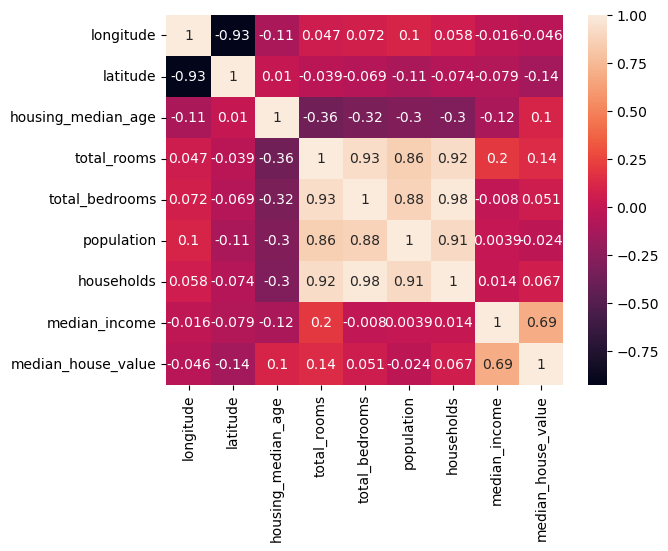

In [103]:
sns.heatmap(df.corr(), annot = True)
plt.show()

variables depend more on each other if the correlation values are less than -0.5 or greater than 0.5 . hence we see that median_income has the most effect on median_house_value (0.67) and so is the reason of plotting our predicted values and true values against it.

In [104]:
def distplot(var , n):
  plt.figure(figsize=(10,10))
  if (n % 2 == 0):
    sns.distplot(var, color='blue') #predicted values in blue colour
  else:
    sns.distplot(var,color='red')  #actual values in red colour


C:\Users\Asus\AppData\Local\Temp\ipykernel_15728\3359160424.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(var,color='red')  #actual values in red colour
C:\Users\Asus\AppData\Local\Temp\ipykernel_15728\3359160424.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(var, color='blue') #predi

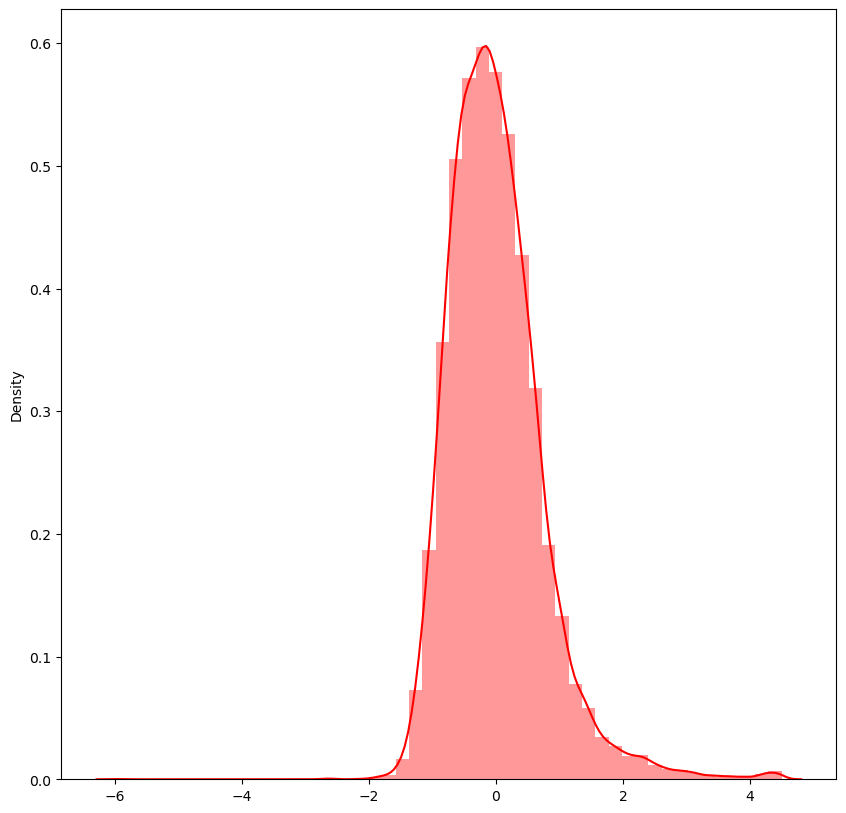

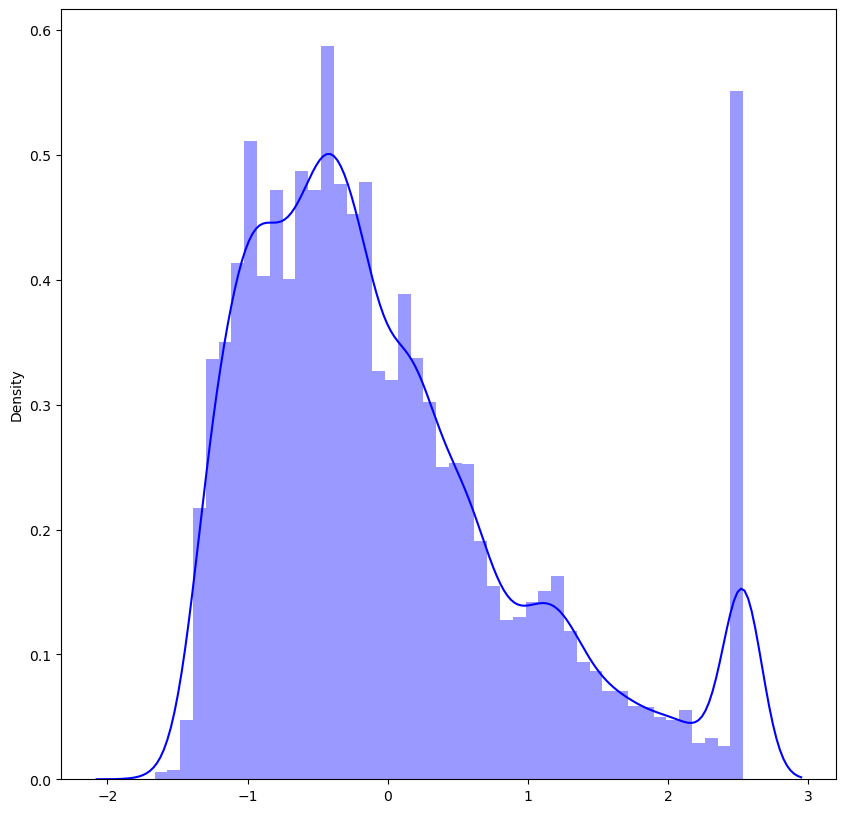

In [105]:
distplot(y_pred, 1)
distplot(y_true, 2)

distplot is basically a histogram which shows the density of the predicted values in comparision with the actual values, as we see most of our actual data lies between -2 and +2,
  so is the case with our predicted data and hence we can infer that our predicted values are close enough to the actual ones.

# Part II - Neural Networks

### Reading the data from CSV and storing in a dataframe

In [106]:
df = pd.read_csv('housing_data.csv')
assert df.shape == (20000,11)

### Dropping columns having irrelevant/NaN data in them

In [107]:
df.dropna(axis=1, inplace = True)
assert df.shape == (20000,9)

### Scaling the dataset

In [108]:
scaler= MinMaxScaler()
scaler.fit(df)
scaled_values = scaler.transform(df)
scaled_df = pd.DataFrame(scaled_values, columns=df.columns)
scaled_df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0   1.000000  0.175345            0.274510     0.147885        0.198945   
1   0.984064  0.197662            0.352941     0.201608        0.294848   
2   0.975100  0.122210            0.313725     0.018927        0.026847   
3   0.974104  0.116897            0.254902     0.039515        0.052142   
4   0.974104  0.109458            0.372549     0.038276        0.050435   

   population  households  median_income  median_house_value  
0    0.028364    0.077454       0.068530            0.107012  
1    0.031559    0.075974       0.091040            0.134228  
2    0.009249    0.019076       0.079378            0.145775  
3    0.014350    0.037000       0.185639            0.120414  
4    0.017405    0.042921       0.098281            0.104125

## An overview of our model
The image below shows the structure of the Neural Network we will be building in this assignment. The layers are labeled and the number of neurons for that particular layer are mentioned below them in parentheses.

![NN_4_layer_final.jpg]( 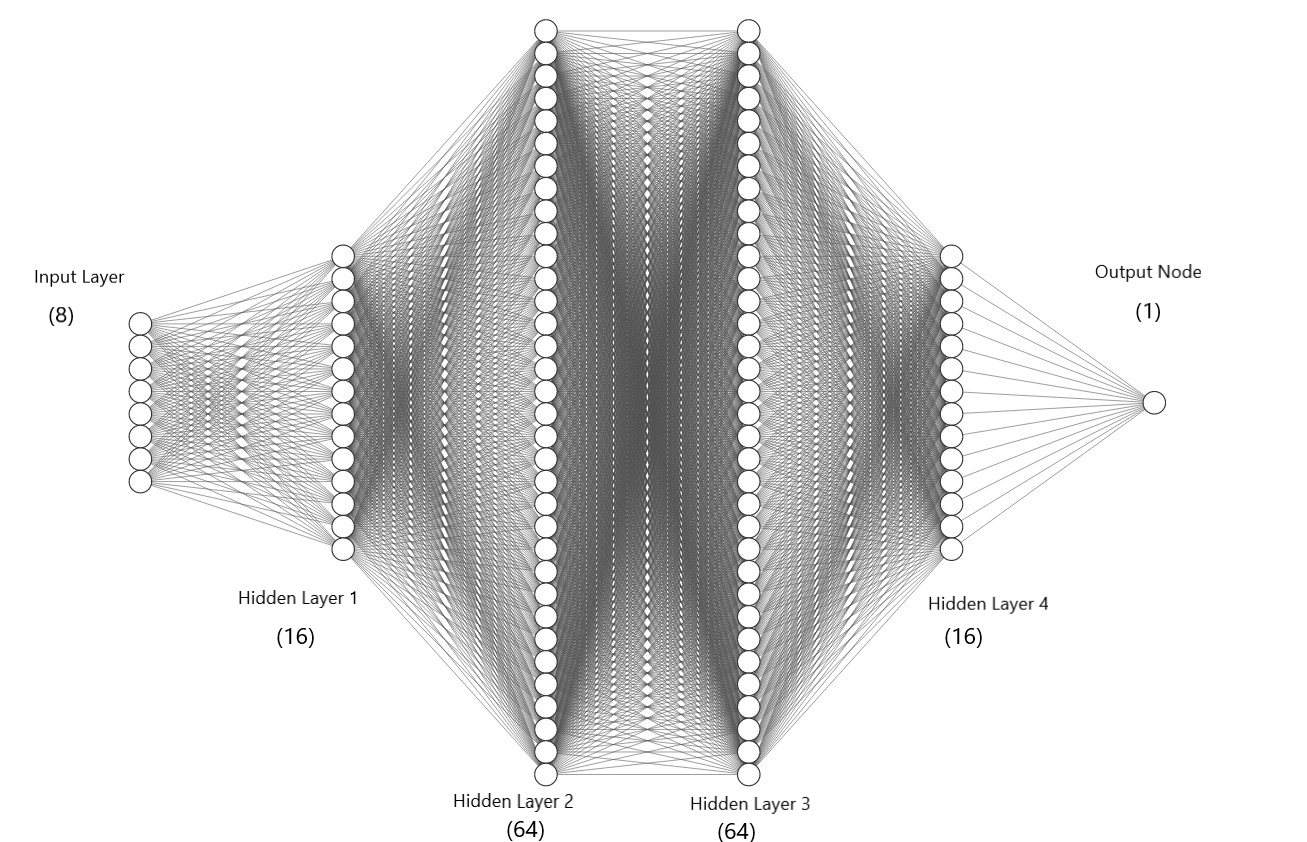)

> **Note**: The number of neurons in the diagram is different than the actual number given below them in parantheses for representation purposes. The number written is the actual number of neurons you will use for your architecture

## Architecture:

In the subsequent cells we will be implementing a **five-layer fully-connected neural network**. The network has an input dimension of I, four hidden layers dimensions of H1, H2, H3, and H4 and performs regression. Hence the output layer will consist of 1 neuron.

We train the network with Mean Squraed Error loss function and L2 regularization on the weight matrices. The network uses a ReLU nonlinearity in between the hidden layers and after the output layer.

In other words, the network has the following architecture:

    input - fully connected layer - ReLU - fully connected layer - ReLU - fully connected layer -ReLU - fully connected layer -ReLU - fully connected layer -RelU

The outputs of the fifth fully-connected layer give us the result

## Terminologies used for describing the computations of the Neural Network:
* Superscript $[h]$ denotes a quantity associated with the $h^{th}$ layer.
    - Example: $a^{[h]}$ is the $h^{th}$ layer activation. $W^{[h]}$ and $b^{[h]}$ are the $h^{th}$ layer parameters.
* Superscript $(i)$ denotes a quantity associated with the $i^{th}$ example.
    - Example: $y^{(i)}$ is the ground truth label corresponding to the $i^{th}$ training example.



* A layer of the neural network consists of:
    - a weight matrix $W^{[h]}$of shape (size of current layer, size of previous layer)
    - a bias vector $b^{[h]} $of shape (size of current layer, 1)
    - an activation function $ g^{[h]} $
* Computation in a layer $h$ of the neural network can be described as follows:
  - Let $a^{[h-1]}$ be the activations of the previous layer or input data (if current layer is first hidden layer), of shape (size of previous layer, number of examples).
  - Let $ z^{[h]} $ be the pre-activation value. Then, $ z^{[h]} $ is computed as :
  $$ z^{[h]} = W^{[h]}.a^{[h-1]}+b^{[h]}$$
  where $ . $ denotes matrix multiplication.
  So, $z^{[h]}$ will be of shape (size of current layer, number of examples).
  - Let $a^{[h]}$ denote post activation value. It is computed as:
  $$ a^{[h]} = g^{[h]}(z^{[h]}) $$
  Note that shape of $a^{[h]}$ is same as that of $a^{[h]}$.
  
  - Also note that $A^{[0]}$ is nothing but $X$, the input data.

This function carries out computations of a single layer of the neural network:
 $$ z^{[h]} = W^{[h]}.a^{[h-1]}+b^{[h]}$$
 $$ a^{[h]} = g^{[h]}(z^{[h]}) $$

## Step 1: Initializing the parameters (weights and biases)



In the next function, weights are initialized to random values in the range [0, 0.1) using np.random.rand appropriately and biases are initialized to zero

HINT : Initialise weights using numpy.random.rand which gives numbers between [0,1) and then convert all the numbers in this numpy array from [0,1) to [0,0.1) by dividing by a certain number

In [111]:
def Initialization(I, H1, H2, H3, H4, O):
    '''
    Weights are initialized to random values in the range [0, 0.1) using np.random.rand appropriately and
    biases are initialized to zero. The dimensions of the
    parameters as as follows:-

          W1: First layer weights; has shape (H1, I)
          b1: First layer biases; has shape (H1, 1)
          W2: Second layer weights; has shape (H2, H1)
          b2: Second layer biases; has shape (H2, 1)
          W3: Third layer weights; has shape (H3, H2)
          b3: Third layer biases; has shape (H3, 1)
          W4: Fourth layer weights; has shape (H4,H3)
          b4: Fourth layer biases; has shape (H4, 1)
          W5: Fifth layer weights has shape (O,H4)
          b5: Fifth layer biases; has shape (O,1)

          Inputs:
          - I: The number of features of the input data.
          - H1: The number of neurons in the hidden layer - 1.
          - H2: The number of neurons in the hidden layer - 2.
          - H3: The number of neurons in the hidden layer - 3.
          - H4: The number of neurons in the hidden layer - 4.
          - O: The number of outputs(i.e. 1).

          Outputs:
          - paramters_final: List containing of parameters
          after they are initialized with appropriate values in this order:
          [W1, b1, W2, b2, W3, b3, W4, b4, W5, b5 ]
        '''

    # START TODO ################
    W1 = np.random.rand(H1, I) * 0.1
    b1 = np.zeros((H1, 1))
    
    W2 = np.random.rand(H2, H1) * 0.1
    b2 = np.zeros((H2, 1))
    
    W3 = np.random.rand(H3, H2) * 0.1
    b3 = np.zeros((H3, 1))
    
    W4 = np.random.rand(H4, H3) * 0.1
    b4 = np.zeros((H4, 1))
    
    W5 = np.random.rand(O, H4) * 0.1
    b5 = np.zeros((O, 1))
    
    return [W1, b1, W2, b2, W3, b3, W4, b4, W5, b5]

    # END TODO ###################
    raise NotImplementedError()

In [112]:
#Sample test case
np.random.seed(2)
tln = Initialization(2, 3, 2, 1, 1, 1)
assert tln[0].shape == (3, 2)
assert tln[1].shape == (3, 1)
assert tln[2].shape == (2, 3)
assert tln[3].shape == (2, 1)
assert tln[4].shape == (1, 2)
assert tln[5].shape == (1, 1)
assert tln[6].shape == (1, 1)
assert tln[7].shape == (1, 1)
assert tln[8].shape == (1, 1)
assert tln[9].shape == (1, 1)
assert np.allclose(tln[0][0][0],0.04359949021420038)
print('Sample Test passed', '\U0001F44D')

Sample Test passed üëç


In [40]:
# hidden test cases. Do not modify

> Similarly add 2 cells after every function so that after every cell containg a FUNCTION, there are 2 cells after that containing test cases for that particular function

## Step 2: Implement the activation function

Activation functions used:

$$relu(z) = max(0, z)$$

In [41]:
def relu(x):

    # START TODO ################
    return np.maximum(0, x)
    # END TODO ###################
    raise NotImplementedError()
    


In [42]:
# sample test case
assert np.allclose(relu(np.array([[3,-4]])), np.array([[3,0]]))
print('Sample Test passed', '\U0001F44D')

Sample Test passed üëç


In [43]:
# hidden test cases. Do not modify

## Step 3: Forward propagation

In [44]:
def feed_forward(X, params):
    '''
    Using the formulae given below, apply forward propagation for each layer according to the defined architecture

    z = wX + b
    a = g(z)  {g being the non linear function i.e the activation function}

    Inputs:
    - X : Input data of shape (8, total_number_of_rows). Each X[i] is a feature and each X[:][i] is a training sample
    - params: List containing the parameters of the model

    Outputs:
    - y_out : predicted price
    - l : List containing the activation and linear outputs of each layer in the following fashion
      [z1,a1,z2,a2,z3,a3,z4,a4,z5,a5]
    '''

    # START TODO ################
    W1, b1, W2, b2, W3, b3, W4, b4, W5, b5 = params
    
    z1 = W1 @ X + b1
    a1 = relu(z1)
    
    z2 = W2 @ a1 + b2
    a2 = relu(z2)
    
    z3 = W3 @ a2 + b3
    a3 = relu(z3)
    
    z4 = W4 @ a3 + b4
    a4 = relu(z4)
    
    z5 = W5 @ a4 + b5
    a5 = relu(z5)
    
    l = [z1, a1, z2, a2, z3, a3, z4, a4, z5, a5]
    return a5, l
    # END TODO ###################
    raise NotImplementedError()

In [45]:
np.random.seed(2)
para = Initialization(6, 3, 2, 2, 1, 1)
y_forward,l = feed_forward(np.random.rand(6,10), para)
assert y_forward.shape == (1, 10)
assert np.allclose(y_forward[0][5], 1.2063488250870311e-06)
assert l[0].shape==(3,10)
assert l[2].shape==(2,10)
assert l[6].shape==(1,10)
assert np.allclose(l[0][0][1], 0.11645815161695633)
print('Sample Test passed', '\U0001F44D')

Sample Test passed üëç


In [46]:
# hidden test cases. Do not modify

## Step 4: Calculating the loss

(*Loss*) $L = \frac{1}{2m} * \sum({yd -y\_pred})^{2} $ <br>

where $yd$ is the desired value of y i.e. the one present in our set whereas $y\_pred$ is the value of target we have predicted, and m is the no of examples. <br>


In [47]:
def loss_compute(y_pred, yd):
    '''
    Inputs:
    - y_pred: numpy array containing predicted values of target
    - yd: numpy array containing desired values of y given in the
    dataset

    Outputs:
    - loss: Calculate and return the loss using the above formula
    '''
    # START TODO ################
    m = yd.shape[1]
    return (1 / (2 * m)) * np.sum((yd - y_pred) ** 2)
    # END TODO ###################
    raise NotImplementedError()

In [48]:
# TEST CASE 1

sample_loss = loss_compute(np.array([[1,1]]) , np.array([[1,0]]))
assert np.allclose(sample_loss,0.25)
print('Sample Test passed', '\U0001F44D')

Sample Test passed üëç


In [49]:
# hidden test cases. Do not modify

## Step 5: Regularization
It is a technique that discourages learning a more complex or flexible model, so as to avoid the risk of overfitting. It improves the generalization capability of a model, i.e. its performance on unseen test examples.

**Step 5: A function to add regularization by sum of squares so as to prevent overfitting the data**




$$J_{regularized} =  \underbrace{\frac{1}{2m}\sum_{i=1}^{m} (y^{(i)}-a^{[L](i)})^{2}}_{\text{Mean Squared Cost}} +\underbrace{\frac{1}{m}\frac{\lambda}{2}\sum_{l}\sum_{k}\sum_{j}W_{k.j}^{[l]2}}_{\text{L2 regularization cost}}$$

where (k, j) refer to the shape of that pariculat W (weight matrix) and $ l $ refers to the layer number.


You have already implemented Mean Squared Cost function in the last cell. Now in the function below, you'll implement the L2 regularization cost using the formula given

HINT : Try to see what the two inner summations $ \sum_{k}\sum_{j} $ of a particular weight matrix(or any random matrix) looks like. The code for the double summation summed over all layers of our Network, is much much easier than the formula

In [50]:
def regularization_L2(lmbda, W1, W2, W3, W4, W5, m):
    '''
    Inputs:
    - lmbda: Regularization parameter
    - W1, W2, W3, W4, W5: numpy arrays containing weights of the model
    - m: no of examples

    Outputs:
    - total_reg_loss: sum of L2 regularization loss of each layer
    '''

    # START TODO ################
    total = np.sum(W1**2) + np.sum(W2**2) + np.sum(W3**2) + np.sum(W4**2) + np.sum(W5**2)
    return (lmbda / (2 * m)) * total
    # END TODO ###################
    raise NotImplementedError()

In [51]:
# TEST CASE 1

assert np.allclose(regularization_L2(1,np.array([[1]]),np.array([[1]]),np.array([[1]]),np.array([[1]]),np.array([[1]]),1),2.5)
print('Sample Test passed', '\U0001F44D')

Sample Test passed üëç


In [52]:
# hidden test cases. Do not modify

## Step 6: Making helper functions for backpropagation
Our next step will be to create some helper functions before starting
backpropagation


### Helper Function 1

We would need derivatives of  the **ReLU** function.

Hint: ReLU function derivative can be calculated in one step using lambda functions. For more information, refer to this link: https://www.w3schools.com/python/python_lambda.asp


Note the following rules for the activation function:
$$ \frac{\partial \mathcal{(relu(z))} }{\partial z} =   \left\{
\begin{array}{ll}
      1 & z>=0 \\
      0& z < 0 \\
\end{array}
\right. $$

Note:
The function relu(z) can be written as A(z) where A stands for activation function.

$$ \frac{\partial \mathcal{(relu(z))} }{\partial z} = \frac{\partial \mathcal{A(z)} }{\partial z} $$

In [53]:
#DERIVATIVE OF RELU
def drelu(x):

    # START TODO ################
    return (x > 0).astype(float)    
    # END TODO ###################
    raise NotImplementedError()

In [54]:
# TEST CASE
assert np.allclose(drelu(np.array([[2,-3]])), np.array([[1,0]]))
print('Sample Test passed', '\U0001F44D')

Sample Test passed üëç


In [55]:
# hidden test cases. Do not modify

### Helper Function 2

Here, We would be creating a helper function to calculate and return the values of dz, dW, and db for each layer. Refer to the formulae provided below to get a clear understanding of it's implementation.

Note that the value of **dz depends on the derivatives of activation functions** used for that layer and the functions that we have created above may come in handy.

This function computes  $dZ^{[h]} = \frac{\partial \mathcal{L} }{\partial Z^{[h]}}$, given  $dA^{[h]} = \frac{\partial \mathcal{L} }{\partial A^{[h]}}$ and $Z^{[h]}$as inputs. It is based on the following chain rule from calculus:


$$ dZ^{[h]} = \frac{\partial \mathcal{L} }{\partial A^{[h]}} * \frac{\partial \mathcal{A^{[h]}} }{\partial Z^{[h]}}$$

$$ dZ^{[h]} = dA^{[h]} * \frac{\partial \mathcal{A^{[h]}} }{\partial Z^{[h]}}$$



  - $ dW^{[h]} = \frac{\partial \mathcal{L} }{\partial W^{[h]}} = \frac{1}{m} dZ^{[h]} A^{[h-1] T}$
  - $ db^{[h]} = \frac{\partial \mathcal{L} }{\partial b^{[h]}} = \frac{1}{m} \sum_{i = 1}^{m} dZ^{[h](i)}$
  - $ dW_{total}^{[h]} = dW^{[h]} + dW_{reg}^{[h]} $

where $ dW_{reg}^{[h]} = \frac{1}{m} * lambda * weight^{[h]} $

The reason we are calculating $ dW^{[h]} $ and $ db^{[h]} $ is they are the ***learnable parameters*** of our model.

$ dW^{[h]} = \frac{\partial \mathcal{L} }{\partial W^{[h]}} $ signifies the contribution of $ W^{[h]} $ to our loss function $ \mathcal{L} $.
This gradients $ dW^{[h]} $ and $ db^{[h]} $ will help us perform Gradient Descent on our parameters $ W^{[h]} $ and $ b^{[h]} $

If you want to understand more about derivation of above formulas or just about backpropogation in general, look through these slides once : https://www.cs.toronto.edu/~rgrosse/courses/csc321_2018/slides/lec06.pdf
<br />
<br />

 **NOTE**
: Try to use vectorization as far as possible instead of loops as it would be simpler for you to debug

In [56]:
def back_prop_linear(da_layer, z_layer, input, act_fxn, m, lmbda, weight):
    '''
    Inputs:
    - da_layer: derivative of variable 'a' of that layer
    - z_layer: numpy array of 'z' values for that layer

    - input: input value of that layer, for example, X is the
    input for the first layer, and for other layers, it is the activation A of the previous layer.
    So if you're calculating dz4, dw4 , db4 (layer 4)  - input would  be a3

    - act_fxn: string containing the name of the activation
    function used in that layer,i.e. 'relu' in our case

    - m: number of datapoints
    - lmbda: regularization parameter
    - weight: weights of that particular layer

      Outputs:
    - dz: returns the derivative of linear function variable
    - dW: returns the change in weights for that layer
    - db: returns the change in bias for that layer (you may need to use the `keepdims` parameter to get the correct shape)

    return in the order dz,dw,db
    '''
    dz = da_layer*drelu(z_layer)
    dw = (np.dot(dz, input.T) + lmbda*weight)/m
    db = np.expand_dims(np.sum(dz,axis = 1)/m, axis = 1)


    return dz,dw,db
    raise NotImplementedError()

In [57]:
# TEST CASE
m=1
# previous layer has 2 neurons and current layer has 2 neurons
z_h=np.array([[1],[2]])
da_h=np.array([[0.1],[0.2]])
inp=np.array([[1],[0]])
weights=np.array([[1,1],[2,0]])
dz, dW, db = back_prop_linear(da_h, z_h, inp, 'relu' , m, 1, weights)
assert np.allclose(dz,np.array([[0.1],[0.2]]))
assert np.allclose(dW,np.array([[1.1,1],[2.2,0]]))
assert np.allclose(db,np.array([[0.1],[0.2]]))
print('Sample Test passed', '\U0001F44D')

Sample Test passed üëç


In [58]:
# hidden test cases. Do not modify

### Helper Function 3

We would need a helper function to calculate the derivatives of activation function variables

We will calculate dA for the last layer separately in the subsequent function.

For all other layers, we proceed as follows :



Using this formula

  - $ Z^{[h]} = W^{[h]}.A^{[h-1]}+b^{[h]}$


  - $ dA^{[h-1]} = \frac{\partial \mathcal{L} }{\partial A^{[h-1]}} = W^{[h] T} dZ^{[h]}$

In [59]:
def back_prop_actf(W_plusone, dz_plusone):
    '''
    Inputs:
    - W_plusone: Weights of the next layer
    - dz_plusone: Derivative of the linear function of the next
    layer

    Outputs:
    - act_dtive: returns the derivative of activation function variable

    NOTE : This function can be used to find dA for EVERY layer EXCEPT the last layer
    '''
    return np.dot(W_plusone.T, dz_plusone)
    raise NotImplementedError()

In [60]:
der=back_prop_actf(np.array([[1],[2]]), np.array([[2],[3]]))
assert np.allclose(der,np.array([[8]]))
print('Sample Test passed', '\U0001F44D')

Sample Test passed üëç


In [61]:
# hidden test cases. Do not modify

## Combining all the helper functions for Backpropogation

Now we will be creating the main function for backpropagation where we combine all the helper functions to update the weights. We will first compute errors at the last layer and backpropagate them through the network to get the desired $dW$ and $db$ for each layer.

We would using a single function to return these values as the formula remains the same.

To backpropagate through this network, we know that the output is, $ ypred = A^{[H]} = ReLU(Z^{[H]})$. Your code thus needs to compute $ dA^{[H]} = \frac{\partial \mathcal{L}}{\partial A^{[H]}}$. To do so, use this formula:
$$ dA^{[H]} = -({yd -A^{[H]}})$$

**Remember: This is only for the last layer, use the above helper function for the other layers.**

**HINT:** Use the back_prop_linear function to obtain $dz,dW,db$ at each layer.

So to sum up all the Backpropogation helper functions and combine them in the next function :

Calculate $ dA^{[H]} = \frac{\partial \mathcal{L}}{\partial A^{[H]}}$ for the **last layer** using the forumula:
$$ dA^{[H]} = -({yd -A^{[H]}})$$

After that , calculate  $ dW^{[H]}$ ,  $db^{[H]}$ and  $ dz^{[H]} $ using back_prop_linear function.

HINT : You already have $ dA^{[5]} $ using the formula given above. From that you can calculate $ dW^{[5]}$ ,  $db^{[5]}$ and  $ dz^{[5]} $ using back_prop_linear function

Now use back_prop_actf to find $ dA^{[4]} $ followed by back_prop_linear to find $ dW^{[4]}$ ,  $db^{[4]}$ and  $ dz^{[4]} $

Continue this process till you have the gradients for all 5 Weights and Biases

In [62]:
def Backpropagation1(X, yd, l, y_pred, parameters, lmbda):
    '''
      Inputs:
      - X: Input features - shape (no of features, no of examples)
      - yd: y desired values(labels given in dataset)
      - l: list containing values of 'z' and 'a' of each layer
      - parameters: list containing weights and biases of each layer
      - lmbda: regularization parameter

      Outputs:
      - grad: dictionary containing the change in the values of weights
      and biases with keys 'dW1','dW2','dW3','dW4','dW5','db1','db2','db3','db4','db5'
    '''

    # START TODO ################
    W1, b1, W2, b2, W3, b3, W4, b4, W5, b5 = parameters
    z1, a1, z2, a2, z3, a3, z4, a4, z5, a5 = l
    m = X.shape[1]
    
    dA5 = -(yd - y_pred)
    dz5, dW5, db5 = back_prop_linear(dA5, z5, a4, 'relu', m, lmbda, W5)
    
    # Backpropagate to layer 4
    dA4 = W5.T @ dz5
    dz4, dW4, db4 = back_prop_linear(dA4, z4, a3, 'relu', m, lmbda, W4)
    
    # Backpropagate to layer 3
    dA3 = W4.T @ dz4
    dz3, dW3, db3 = back_prop_linear(dA3, z3, a2, 'relu', m, lmbda, W3)
    
    # Backpropagate to layer 2
    dA2 = W3.T @ dz3
    dz2, dW2, db2 = back_prop_linear(dA2, z2, a1, 'relu', m, lmbda, W2)
    
    # Backpropagate to layer 1
    dA1 = W2.T @ dz2
    dz1, dW1, db1 = back_prop_linear(dA1, z1, X, 'relu', m, lmbda, W1)
    
    grad = {
        'dW1': dW1, 'db1': db1,
        'dW2': dW2, 'db2': db2,
        'dW3': dW3, 'db3': db3,
        'dW4': dW4, 'db4': db4,
        'dW5': dW5, 'db5': db5
    }
    return grad
    # END TODO ###################
    raise NotImplementedError()

In [63]:
grads_check = {'dW1' : np.array([0.00477814 ,0.00262214]),
               'dW2' : np.array([0.00338872 ,0.00096401]),
               'dW3' : np.array([0.00384367 ,0.00093328 ,0.00427237]),
               'dW4' : np.array([0.00477098 ,0.00216877 ,0.00474162]),
               'dW5' : np.array([0.00010706 ,0.00272906]),
               'db1': np.array([-5.70127772e-05]),
               'db2': np.array([-0.00048472]),
               'db3': np.array([-0.00272006]),
               'db4': np.array([-0.00374705]),
               'db5': np.array([-0.4999496])
              }
np.random.seed(4)
parameters = Initialization(2, 2, 3, 3, 2, 1)
X = np.array([[1,2],[2,3]])
y_pred, l = feed_forward(X, parameters)
sample_grads = Backpropagation1(X, np.array([[1,0]]), l, y_pred, parameters, lmbda = 0.1)
for key in grads_check.keys():
    assert np.allclose(grads_check[key],sample_grads[key][0])
print('Sample Test passed', '\U0001F44D')

Sample Test passed üëç


In [64]:
# hidden test cases. Do not modify

The weights are now updated in each iteration via the learning rules:

$$ W^{[h]} = W^{[h]} - \alpha \text{ } dW^{[h]} $$
$$ b^{[h]} = b^{[h]} - \alpha \text{ } db^{[h]} $$

where h takes value from 1 to 5 for our 4 hidden layers and 1 output node
<br />
<br />

- We are done with most of the code now, yet there is the most important function left to be created - where we will be training our model.

- Refer to the overview again before writing a code for this function.

- You will have to call the above functions repeatedly and update the weights and bias with each iteration

- The values of number of iterations(num_iters), learning rate(eta) and regularization parameter(lmbda) **have been already tuned**. If you wish to experiment on these variables for a better understanding, you are free to do so. The final result, however, will be evaluated using the values given.

## Training your model

For training the model you need to do the following in the next function:
1) You are provided with *X, yd, parameters* as arguments. *X* and *yd* are scaled so **DO NOT** scale them again inside this *training* function

2) Store W1 to W5 and b1 to b5 (weights and biases) in **seperate variables** by accessing the *parameters* argument

3) Initialise an empty list to which you will append the loss of every iteration

4) Now for N number of iterations:
     - compute y_predicted and a5 using feedforward
     
     - compute loss using y_predicted and yd - say loss_1
     
     - calculate regularization loss say loss_2
     
     - total loss = loss_1 + loss_2
     
     - append this to the list you created in step 3
     
     - calculate gradients
     
     - update W1 to W5 and b1 to b5 by using the gradients calculated above
     
     - in the next iteration , when using feed forward use these updated W1 to W5 and b1 to  b5
     
     - And then follow this for N iterations
     
5) Return the history of loss (that list you created in step 3 populated with loss of every iteration) and the trained *W* and *b*

In [65]:
def training(X, yd, parameters, eta = 0.05, num_iters=3000, lmbda = 0.1):
    '''
      Inputs:
      - X: Input features - shape (no of features, no of examples)
      - yd: y desired values of shape (1,no. of examples)
      - parameters - The initial parameters of the model (W and b) in the same format as they were returned by the
          Initialization function ie. [W1, b1, W2, b2, W3, b3, W4, b4, W5, b5 ]
      - eta: learning rate
      - num_iters: number of iterations
      - lmbda: regularization parameter

      Outputs:
      - losses: list of loss at the start of each iteration
      - parameters: the final TRAINED parameters
      Return in the format : losses,[W1,b1,W2,b2,W3,b3,W4,b4,W5,b5]
    '''
    # START TODO ################
    W1, b1, W2, b2, W3, b3, W4, b4, W5, b5 = parameters
    losses = []
    
    for i in range(num_iters):
        params = [W1, b1, W2, b2, W3, b3, W4, b4, W5, b5]
        y_pred, l = feed_forward(X, params)
        
        loss1 = loss_compute(y_pred, yd)
        loss2 = regularization_L2(lmbda, W1, W2, W3, W4, W5, X.shape[1])
        total_loss = loss1 + loss2
        losses.append(total_loss)
        
        grads = Backpropagation1(X, yd, l, y_pred, params, lmbda)
        
        W1 -= eta * grads['dW1']
        b1 -= eta * grads['db1']
        W2 -= eta * grads['dW2']
        b2 -= eta * grads['db2']
        W3 -= eta * grads['dW3']
        b3 -= eta * grads['db3']
        W4 -= eta * grads['dW4']
        b4 -= eta * grads['db4']
        W5 -= eta * grads['dW5']
        b5 -= eta * grads['db5']
    
    trained_params = [W1, b1, W2, b2, W3, b3, W4, b4, W5, b5]
    return losses, trained_params
    # END TODO ###################
    raise NotImplementedError()


In [66]:
#See the starting of Neural Network section where we decclared the scaled_df dataframe
X_df = scaled_df.iloc[:,0:8] # The first 8 columns are our X variables
Y_df = scaled_df.iloc[:,8:9] # The 9th column or 'median_house_value' is what we are trying to predict
x_train  = X_df.values.T
y_actual = Y_df.values.reshape(1,-1)

In [67]:
#Sample test case
np.random.seed(2)
parameters = Initialization(8,16,64,64,16,1)#ALL ACTIVATION RELU
losses, parameters_final = training(x_train, y_actual,parameters, eta = 0.05, num_iters=300, lmbda = 0.1)
assert np.allclose(losses[200],0.018760000609514545)
print('Sample Test passed', '\U0001F44D')
#You can change num_iters to 10000, will take around 10-15 minutes to train
'''
You can also play around with the model hyper-parameters to see if you can improve on our results
Try changing:
    - The model architecture (number of layers, number of neurons in each layer)
    - The batch size
    - The learning rate

Make sure you set the parameters to their original values before submitting the assignment
'''

Sample Test passed üëç


'\nYou can also play around with the model hyper-parameters to see if you can improve on our results\nTry changing:\n    - The model architecture (number of layers, number of neurons in each layer)\n    - The batch size\n    - The learning rate\n\nMake sure you set the parameters to their original values before submitting the assignment\n'

In [68]:
# hidden test cases. Do not modify

To self-evaluate the result obtained, plot the loss function with respect to the number of iterations and rethink the algorithm if your loss function is not reaching a minimum value.

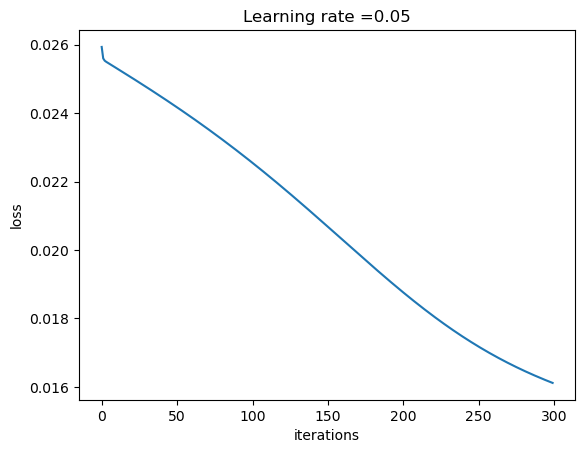

In [69]:
plt.plot(losses)
plt.ylabel('loss')
plt.xlabel('iterations')
plt.title("Learning rate =" + str(0.05))
plt.show()

> If everything goes well, the above loss plot should be reaching 0.012 - 0.010 after around 3k-4k epochs

In [70]:
#Let's see how well our model works on TEST data
df_test  = pd.read_csv('california_housing_test.csv')
scaler = MinMaxScaler()
scaler.fit(df)
test_scaled_data = scaler.transform(df_test)
test_scaled_df = pd.DataFrame(test_scaled_data,columns=df_test.columns) #make sure column names are retained

xtest = test_scaled_df.iloc[:,0:8]
ytest = test_scaled_df.iloc[:,8:9]
xtest  = xtest.values.T
ytest = ytest.values.reshape(1,-1)

ytest_pred = feed_forward(xtest,parameters_final)[0]
print(mean_squared_error(ytest,ytest_pred))

0.031460560985035003


## MNIST

In [114]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [115]:
# Load the MNIST dataset
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

# Convert to numpy arrays
X = np.array(X)
y = np.array(y, dtype=int)

# Select a smaller subset for faster training (optional)
n_samples = 10000
X = X[:n_samples]
y = y[:n_samples]

# Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to appropriate format for neural network (features in rows, samples in columns)
X_train = X_train.T
X_test = X_test.T

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [116]:
def Initialization(I, H1, H2, H3, H4, O):
    # He initialization for better training with ReLU
    W1 = np.random.randn(H1, I) * np.sqrt(2.0 / I)
    b1 = np.zeros((H1, 1))
    
    W2 = np.random.randn(H2, H1) * np.sqrt(2.0 / H1)
    b2 = np.zeros((H2, 1))
    
    W3 = np.random.randn(H3, H2) * np.sqrt(2.0 / H2)
    b3 = np.zeros((H3, 1))
    
    W4 = np.random.randn(H4, H3) * np.sqrt(2.0 / H3)
    b4 = np.zeros((H4, 1))
    
    W5 = np.random.randn(O, H4) * np.sqrt(2.0 / H4)
    b5 = np.zeros((O, 1))
    
    return [W1, b1, W2, b2, W3, b3, W4, b4, W5, b5]



In [117]:
def softmax(x):
    """Compute softmax values for each set of scores in x."""
    # Shift x for numerical stability
    shifted_x = x - np.max(x, axis=0, keepdims=True)
    exp_x = np.exp(shifted_x)
    return exp_x / np.sum(exp_x, axis=0, keepdims=True)

In [118]:
def loss_compute(y_pred, yd):
    """
    Cross-entropy loss for multi-class classification
    
    Inputs:
    - y_pred: predicted probabilities of shape (num_classes, num_examples)
    - yd: one-hot encoded ground truth of shape (num_classes, num_examples)
    
    Outputs:
    - loss: cross-entropy loss
    """
    m = yd.shape[1]
    # Add small epsilon to avoid log(0)
    y_pred = np.clip(y_pred, 1e-10, 1.0)
    return -np.sum(yd * np.log(y_pred)) / m

In [119]:
def feed_forward(X, params):
    W1, b1, W2, b2, W3, b3, W4, b4, W5, b5 = params
    
    z1 = W1 @ X + b1
    a1 = relu(z1)
    
    z2 = W2 @ a1 + b2
    a2 = relu(z2)
    
    z3 = W3 @ a2 + b3
    a3 = relu(z3)
    
    z4 = W4 @ a3 + b4
    a4 = relu(z4)
    
    z5 = W5 @ a4 + b5
    # Use softmax for the output layer instead of ReLU
    a5 = softmax(z5)
    
    l = [z1, a1, z2, a2, z3, a3, z4, a4, z5, a5]
    return a5, l

In [120]:
def Backpropagation1(X, yd, l, y_pred, parameters, lmbda):
    W1, b1, W2, b2, W3, b3, W4, b4, W5, b5 = parameters
    z1, a1, z2, a2, z3, a3, z4, a4, z5, a5 = l
    m = X.shape[1]
    
    # For softmax with cross-entropy loss, the gradient is simple: a5 - yd
    dz5 = y_pred - yd
    dW5 = (dz5 @ a4.T + lmbda * W5) / m
    db5 = np.sum(dz5, axis=1, keepdims=True) / m
    
    # Backpropagate to layer 4
    dA4 = W5.T @ dz5
    dz4, dW4, db4 = back_prop_linear(dA4, z4, a3, 'relu', m, lmbda, W4)
    
    # Backpropagate to layer 3
    dA3 = W4.T @ dz4
    dz3, dW3, db3 = back_prop_linear(dA3, z3, a2, 'relu', m, lmbda, W3)
    
    # Backpropagate to layer 2
    dA2 = W3.T @ dz3
    dz2, dW2, db2 = back_prop_linear(dA2, z2, a1, 'relu', m, lmbda, W2)
    
    # Backpropagate to layer 1
    dA1 = W2.T @ dz2
    dz1, dW1, db1 = back_prop_linear(dA1, z1, X, 'relu', m, lmbda, W1)
    
    grad = {
        'dW1': dW1, 'db1': db1,
        'dW2': dW2, 'db2': db2,
        'dW3': dW3, 'db3': db3,
        'dW4': dW4, 'db4': db4,
        'dW5': dW5, 'db5': db5
    }
    return grad
    # END TODO ###################
    raise NotImplementedError()

Iteration 0: Cost = 1.9750529715268295
Iteration 10: Cost = 0.31396963820786145
Iteration 20: Cost = 0.1676947431314731
Iteration 30: Cost = 0.1054113822751129
Iteration 40: Cost = 0.07161485205823472
Iteration 50: Cost = 0.05269333723839607
Iteration 60: Cost = 0.04209278212983841
Iteration 70: Cost = 0.03601368508790736
Iteration 80: Cost = 0.03223098500705191
Iteration 90: Cost = 0.029794810502945406
Training Accuracy: 99.90%
Test Accuracy: 92.65%


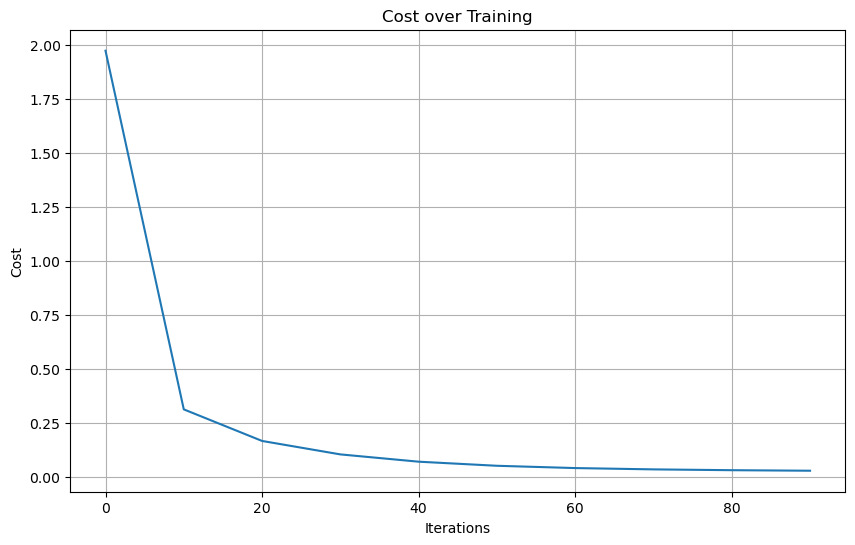

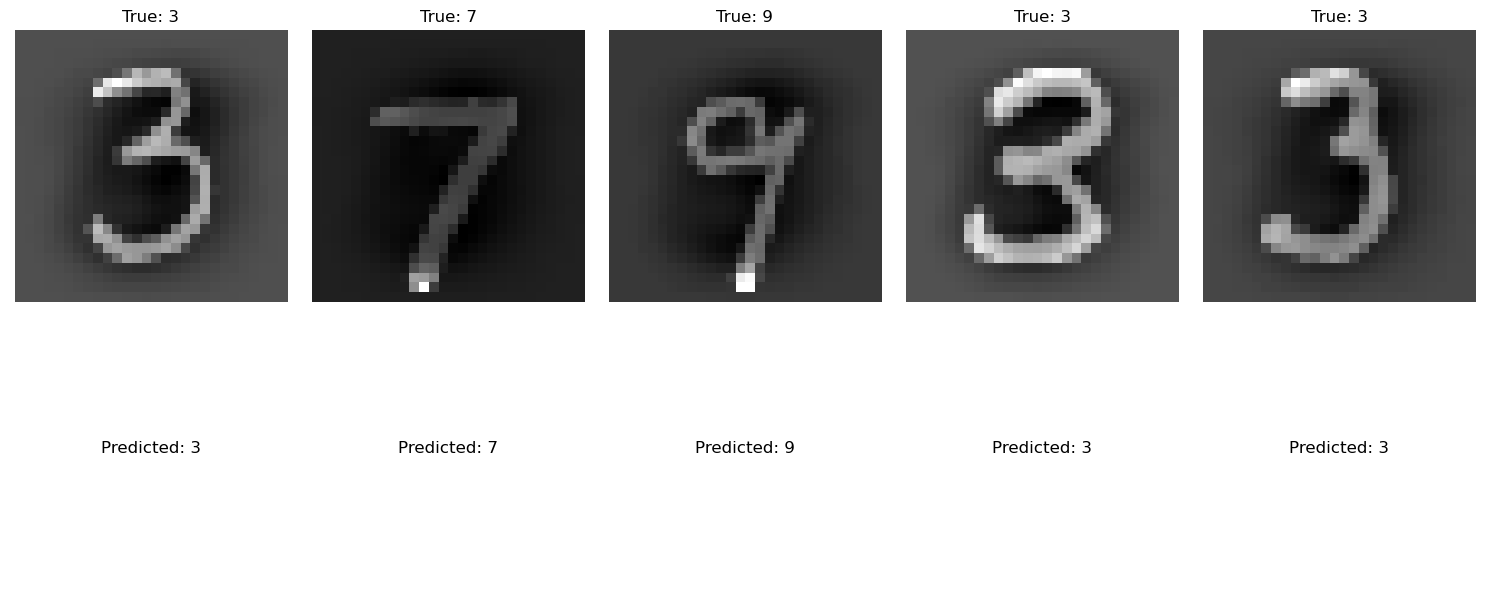

In [121]:

# Convert labels to one-hot encoding
def one_hot_encode(y, num_classes=10):
    m = y.shape[0]
    one_hot = np.zeros((num_classes, m))
    for i in range(m):
        one_hot[y[i], i] = 1
    return one_hot

y_train_one_hot = one_hot_encode(y_train)
y_test_one_hot = one_hot_encode(y_test)

# Define the model training function
def train_model(X, y, layers_dims, learning_rate=0.01, num_iterations=1000, batch_size=64, lmbda=0.01):
    np.random.seed(42)
    costs = []
    
    # Initialize parameters
    parameters = Initialization(layers_dims[0], layers_dims[1], layers_dims[2], 
                                layers_dims[3], layers_dims[4], layers_dims[5])
    
    m = X.shape[1]
    num_batches = m // batch_size
    
    for i in range(num_iterations):
        batch_cost = 0
        
        # Train using mini-batch
        for j in range(num_batches):
            start_idx = j * batch_size
            end_idx = min((j + 1) * batch_size, m)
            
            X_batch = X[:, start_idx:end_idx]
            y_batch = y[:, start_idx:end_idx]
            
            # Forward propagation
            y_pred, cache = feed_forward(X_batch, parameters)
            
            # Compute cost
            cost = loss_compute(y_pred, y_batch)
            reg_cost = regularization_L2(lmbda, parameters[0], parameters[2], 
                                        parameters[4], parameters[6], parameters[8], X_batch.shape[1])
            total_cost = cost + reg_cost
            batch_cost += total_cost
            
            # Backward propagation
            grads = Backpropagation1(X_batch, y_batch, cache, y_pred, parameters, lmbda)
            
            # Update parameters
            parameters[0] -= learning_rate * grads['dW1']
            parameters[1] -= learning_rate * grads['db1']
            parameters[2] -= learning_rate * grads['dW2']
            parameters[3] -= learning_rate * grads['db2']
            parameters[4] -= learning_rate * grads['dW3']
            parameters[5] -= learning_rate * grads['db3']
            parameters[6] -= learning_rate * grads['dW4']
            parameters[7] -= learning_rate * grads['db4']
            parameters[8] -= learning_rate * grads['dW5']
            parameters[9] -= learning_rate * grads['db5']
        
        # Average cost for each iteration
        avg_cost = batch_cost / num_batches
        
        if i % 10 == 0:
            costs.append(avg_cost)
            print(f"Iteration {i}: Cost = {avg_cost}")
    
    return parameters, costs

# Model evaluation
def evaluate_model(X, y, parameters):
    m = X.shape[1]
    y_pred, _ = feed_forward(X, parameters)
    
    # Convert outputs to classes
    pred_classes = np.argmax(y_pred, axis=0)
    true_classes = np.argmax(y, axis=0)
    
    # Calculate accuracy
    accuracy = np.sum(pred_classes == true_classes) / m
    return accuracy, pred_classes

# Define network architecture
# [Input, Hidden Layer 1, Hidden Layer 2, Hidden Layer 3, Hidden Layer 4, Output]
layers_dims = [784, 128, 64, 32, 16, 10]

# Train the model
trained_parameters, costs = train_model(X_train, y_train_one_hot, 
                                        layers_dims, 
                                        learning_rate=0.01, 
                                        num_iterations=100,  # Reduced for faster execution
                                        batch_size=128, 
                                        lmbda=0.01)

# Evaluate model on training data
train_accuracy, _ = evaluate_model(X_train, y_train_one_hot, trained_parameters)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

# Evaluate model on test data
test_accuracy, pred_classes = evaluate_model(X_test, y_test_one_hot, trained_parameters)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Show cost plot
plt.figure(figsize=(10, 6))
plt.plot(range(0, len(costs) * 10, 10), costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost over Training')
plt.grid(True)
plt.show()

# Show some sample images and predictions
def display_predictions(X, y_true, y_pred, n_samples=5):
    fig, axes = plt.subplots(2, n_samples, figsize=(15, 6))
    
    # Randomly select samples
    indices = np.random.choice(X.shape[1], n_samples, replace=False)
    
    for i, idx in enumerate(indices):
        # Display image
        img = X[:, idx].reshape(28, 28)
        axes[0, i].imshow(img, cmap='gray')
        axes[0, i].set_title(f'True: {y_true[idx]}')
        axes[0, i].axis('off')
        
        # Display prediction
        axes[1, i].text(0.5, 0.5, f'Predicted: {y_pred[idx]}', 
                        horizontalalignment='center', verticalalignment='center',
                        fontsize=12)
        axes[1, i].axis('off')
    
    plt.tight_layout()
    plt.show()

# Show predictions
true_classes = np.argmax(y_test_one_hot, axis=0)
display_predictions(X_test, true_classes, pred_classes)